In [100]:
import pandas as pd
from PIL import Image
from scipy.spatial import distance

from skimage import io, filters
from skimage.color import rgb2gray, gray2rgb
from skimage.feature import shape_index
from skimage.transform import rescale, resize, downscale_local_mean, hough_ellipse
from skimage import feature, morphology
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter, ellipse_perimeter
from skimage.util import img_as_ubyte

import skimage
import skimage.feature
import skimage.viewer
import sys

from PIL import Image,ImageEnhance
import cv2
from skimage import measure

In [101]:
I = (plt.imread("what.jpg")*255).astype(dtype=np.uint8)
I = resize(I, (800, 800))

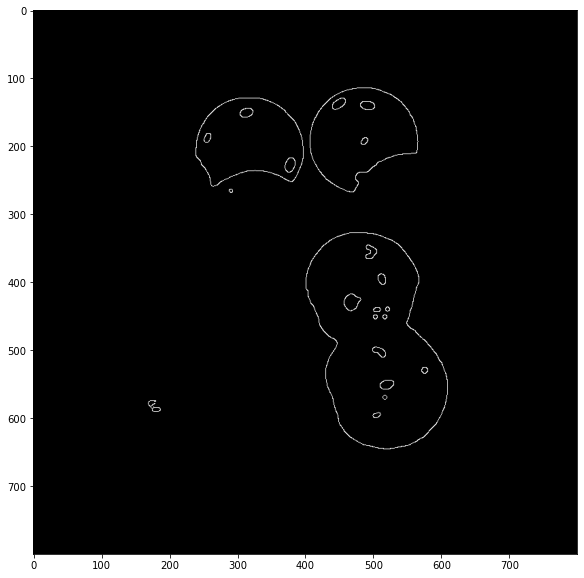

In [102]:
I_lab = color.rgb2lab(I)
X = np.logical_and(I_lab[:, :, 1] > -70, I_lab[:, :, 1] < 120)
Y = np.logical_and(I_lab[:, :, 2] > -120, I_lab[:, :, 2] < 10)
mask = np.logical_and(X, Y)
color.lab2rgb(I_lab*np.repeat(mask[...,None],3,axis=2))


mask = morphology.erosion(mask,morphology.disk(0))
mask = morphology.dilation(mask,morphology.disk(3))


canny_img_blue = feature.canny(mask, sigma=2, low_threshold=0.8)
plt.figure(figsize=(15, 10))
plt.imshow(canny_img_blue, cmap="gray")
plt.show()

In [ ]:
I_lab = color.rgb2lab(I)
X = np.logical_and(I_lab[:, :, 1] > -70, I_lab[:, :, 1] < -25)
Y = np.logical_and(I_lab[:, :, 2] > -60, I_lab[:, :, 2] < 5)
mask = np.logical_and(X, Y)
color.lab2rgb(I_lab*np.repeat(mask[...,None],3,axis=2))


mask = morphology.erosion(mask,morphology.disk(1))
mask = morphology.dilation(mask,morphology.disk(8))


canny_img_red = feature.canny(mask, sigma=2, low_threshold=0.8)
plt.figure(figsize=(15, 10))
plt.imshow(canny_img_red, cmap="gray")
plt.show()



In [ ]:
def MartinStevlik(image):
    hough_radii = np.arange(65, 88)
    hough_res = hough_circle(canny_img_blue, hough_radii)

    accums1, cx1, cy1, radii1 = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=100)

    blue_x = []
    blue_y = []
    blue_radius = []
    dist_blue = []
    unique_blue = []

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    #image = color.gray2rgb(gray)
    for center_y1, center_x1, radius1 in zip(cy1, cx1, radii1):

        for i in range(0,len(blue_radius)):
            a = (center_x1, center_y1)
            b = (blue_x[i], blue_y[i])
            dist_blue.append(int(distance.euclidean(a, b)))

        for j in range(0,len(dist_blue)):
            if dist_blue[j] > radius1:
                unique_blue.append(True)
            else:
                unique_blue.append(False)

        if False not in unique_blue:
            circy1, circx1 = circle_perimeter(center_y1, center_x1, radius1, shape=I.shape)
            I[circy1, circx1] = (0, 0, 255)
            I[circy1+1, circx1+1] = (0, 0, 255)
            I[circy1+2, circx1+2] = (0, 0, 255)
            I[circy1-1, circx1-1] = (0, 0, 255)
            I[circy1-2, circx1-2] = (0, 0, 255)
            blue_x.append(center_x1)
            blue_y.append(center_y1)
            blue_radius.append(radius1)

        dist_blue.clear()
        unique_blue.clear()

    ax.imshow(I, cmap="gray")
    plt.show()


    hough_radii = np.arange(65, 88)
    hough_res = hough_circle(canny_img_red, hough_radii)

    accums1, cx1, cy1, radii1 = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=50)

    red_x = []
    red_y = []
    red_radius = []
    dist_red = []
    unique_red = []

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    #image = color.gray2rgb(gray)
    for center_y1, center_x1, radius1 in zip(cy1, cx1, radii1):

        for i in range(0,len(red_radius)):
            a = (center_x1, center_y1)
            b = (red_x[i], red_y[i])
            dist_red.append(int(distance.euclidean(a, b)))

        for j in range(0,len(dist_red)):
            if dist_red[j] > radius1:
                unique_red.append(True)
            else:
                unique_red.append(False)

        if False not in unique_red:
            circy1, circx1 = circle_perimeter(center_y1, center_x1, radius1, shape=I.shape)
            I[circy1, circx1] = (255, 0, 0)
            I[circy1+1, circx1+1] = (255, 0, 0)
            I[circy1+2, circx1+2] = (255, 0, 0)
            I[circy1-1, circx1-1] = (255, 0, 0)
            I[circy1-2, circx1-2] = (255, 0, 0)
            red_x.append(center_x1)
            red_y.append(center_y1)
            red_radius.append(radius1)

        dist_red.clear()
        unique_red.clear()


    ax.imshow(I, cmap="gray")
    plt.show()
    ratio = len(blue_radius) / len(red_radius)
    print(ratio)

In [ ]:
MartinStevlik(I)